In [1]:
# Downloading the dataset from github.
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

!ls

base_dir = 'Fruit-Images-Dataset/'

!ls Fruit-Images-Dataset/

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 23.00 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.
Fruit-Images-Dataset  sample_data
LICENSE  papers  readme.md  src  Test  test-multiple_fruits  Training


In [3]:
# displaying the available classes.
!ls Fruit-Images-Dataset/Training/

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [2]:
#@title Read training data.

import os 
import cv2

# Read training data, we will use only the next classes in our TP.
CATEGORIES = ["Apple Red 1","Apricot","Avocado","Banana", "Cherry 1", "Fig","Kiwi", "Grape Blue", "Lemon", "Tomato 3", "Strawberry", "Watermelon"] 	# we work with three classes of Apple and Pear
CLASS_NAMES = CATEGORIES

train_images = []
train_dir = os.path.join(base_dir, 'Training/')										              # set the training directory in the path

for category in CATEGORIES:															                        # iterate to each category
    path = os.path.join(train_dir, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):													                    # iterate to each image in the category
        if(image.endswith('jpg') and not image.startswith('.')):
            img_array = cv2.imread(os.path.join(path,image), cv2.COLOR_BGR2RGB)	
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            train_images.append([img_array, class_num])								          # save the image in training data array

print("Training images: ", len(train_images))

Training images:  6742


In [4]:
#@title Read test data.
test_images = []
test_dir = os.path.join(base_dir, 'Test/')										                  # set the test directory in the path

for category in CATEGORIES:															                        # iterate to each category
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):													                    # iterate to each image in the category
        if(image.endswith('jpg') and not image.startswith('.')):
            img_array = cv2.imread(os.path.join(path,image), cv2.COLOR_BGR2RGB)	
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            test_images.append([img_array, class_num])								          # save the image in training data array

print("Training images: ", len(test_images))

Training images:  2250


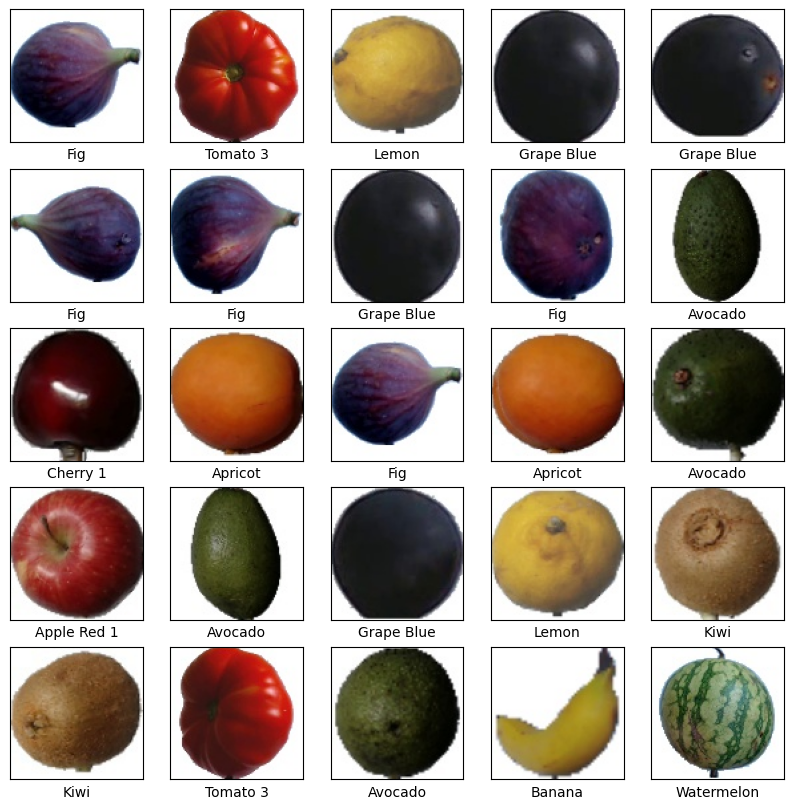

In [5]:
#@title Preview random training images.
import random
import numpy as np
from matplotlib import pyplot as plt

img_idx = random.sample(range(len(train_images)),25)
img_idx = np.array(img_idx)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx[i]][0])
    plt.xlabel(CLASS_NAMES[train_images[img_idx[i]][1]])
plt.show()

#Color Histogram

In [25]:
import os 
import time 
from itertools import product
from PIL import Image
import PIL
import numpy as np

from PIL import Image

def new_conv(image):
    image_array = np.array(image)
    h, w, c = image_array.shape

    first = np.arange(0, 85)
    second = np.arange(85, 171)
    third = np.arange(171, 256)

    for channel in range(c):
        mask = np.zeros_like(image_array[:, :, channel])
        mask[np.isin(image_array[:, :, channel], first)] = 0
        mask[np.isin(image_array[:, :, channel], second)] = 1
        mask[np.isin(image_array[:, :, channel], third)] = 2
        image_array[:, :, channel] = mask

    r = image_array[:, :, 0]
    g = image_array[:, :, 1]
    b = image_array[:, :, 2]
    C = (9 * r) + (3 * g) + b
    color_histogram = np.reshape(C, (1, np.product(C.shape)))

    return color_histogram

In [12]:
from matplotlib import cm
train = np.zeros((len(train_images),100*100))
test = np.zeros((len(test_images),100*100))
print(PIL.Image.fromarray(train_images[0][0]))
for i in range(0,len(train_images)):
    #print(i)
    image = PIL.Image.fromarray(train_images[i][0])
    train[i] = new_conv(image)

for i in range(0,len(test_images)):
    #print(i)
    image = PIL.Image.fromarray(test_images[i][0])
    test[i] = new_conv(image)
train

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FC5D6DC7CA0>


array([[26., 26., 26., ..., 26., 26., 26.],
       [26., 26., 26., ..., 26., 26., 26.],
       [26., 26., 26., ..., 26., 26., 26.],
       ...,
       [26., 26., 26., ..., 26., 26., 26.],
       [26., 26., 26., ..., 26., 26., 26.],
       [26., 26., 26., ..., 26., 26., 26.]])

#KNN

In [24]:
from scipy import stats as st 
def mf(List):
    return max(set(List), key = List.count)
def knn(images,categories,image,k):
  dist=np.sum((images-image)**2,axis=1)
  nearest_images = np.argpartition(dist,k+1)
  print(nearest_images[0:k+1])
  n = np.zeros(nearest_images[0:k].size)
  for i in range(0,n.size):
      n[i] = train_images[nearest_images[i]][1]
  print(n)
  categories=categories[mf(list(n.astype(int)))]
  return categories

#predict

[2125 2254 2156 2380]
[4. 4. 4.]


Text(0, 0.5, 'original is Cherry 1')

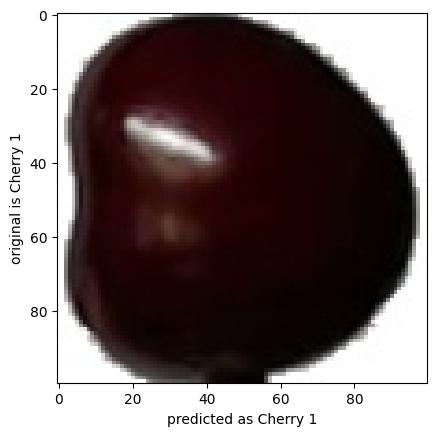

In [23]:
import random
import matplotlib.pyplot as plt

temp = [10, 20, 160, 622, 640]
random_index = random.choice(temp)

R = knn(train, CATEGORIES, test[random_index], 3)
plt.figure()
plt.imshow(test_images[random_index][0])
plt.xlabel("predicted as " + str(R))
plt.ylabel("original is " + CATEGORIES[test_images[random_index][1]])


[242  27 389 145]
[0. 0. 0.]
[224 353 479 800]
[0. 0. 0.]
[ 67  87  68 331]
[0. 0. 0.]
[1586 1417 4591 1673]
[3. 3. 8.]
[2125 2254 2156 2380]
[4. 4. 4.]


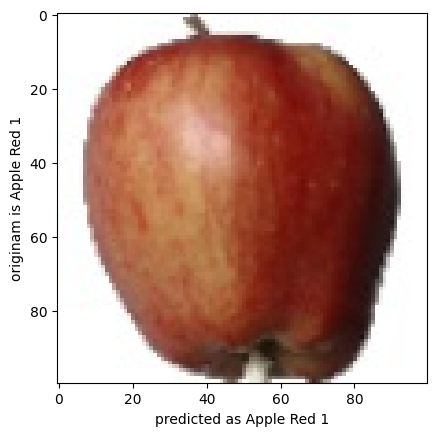

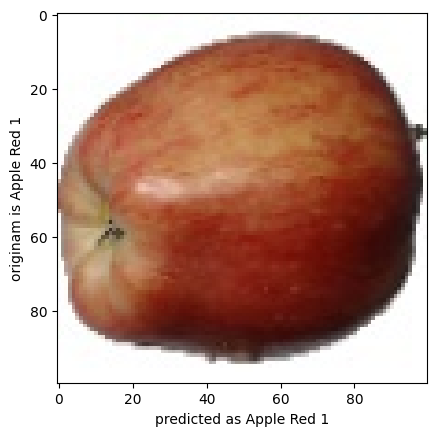

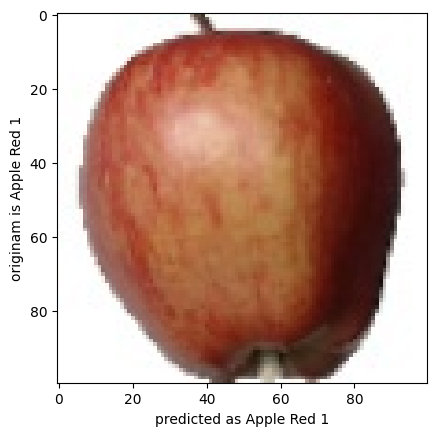

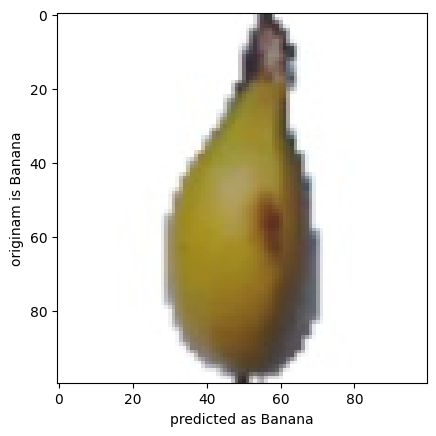

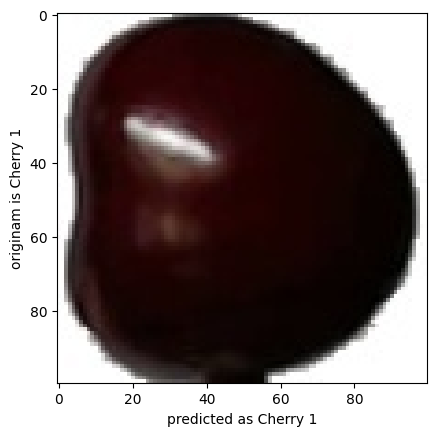

In [19]:
temp=[10,20,160,622,640]

for i in range(0,len(temp)):

    R=knn(train,CATEGORIES,test[temp[i]],3)
    plt.figure()
    plt.imshow(test_images[temp[i]][0])
    plt.xlabel("predicted as "+str(R))
    plt.ylabel("originam is "+CATEGORIES[test_images[temp[i]][1]])